In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')


from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_feature_columns, get_whole_dataset, set_feature_columns
from models.score_model import get_model
from simulation.predictor import MaxProbabilityScorePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import get_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [9]:
home = get_whole_dataset("home_score", filter_start="2014-06-12")
away = get_whole_dataset("away_score", filter_start="2014-06-12")
X = pd.concat([home[0], away[0]])
y = pd.concat([home[1], away[1]])
model = get_model(X=X, y=y, n_estimators=5000)
predictor = MaxProbabilityScorePredictor(model)

In [10]:
tournament_template = pd.read_csv('data/original/wc_2014_games_real.csv')
run_actual_tournament_simulation(tournament_template, predictor)
tournament_simulation = get_simulation_results()
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
delete_all()

print("Accuracy:", sum(tournament_simulation["outcome"] == tournament_simulation["true_outcome"]) / tournament_template.shape[0])
tournament_simulation

KeyboardInterrupt: 

In [ ]:
match_bets = pd.read_csv('data/original/wc_2014_bets.csv')
match_bets

Profit: 33.875%
Balance:  85.68


85.680000000000021

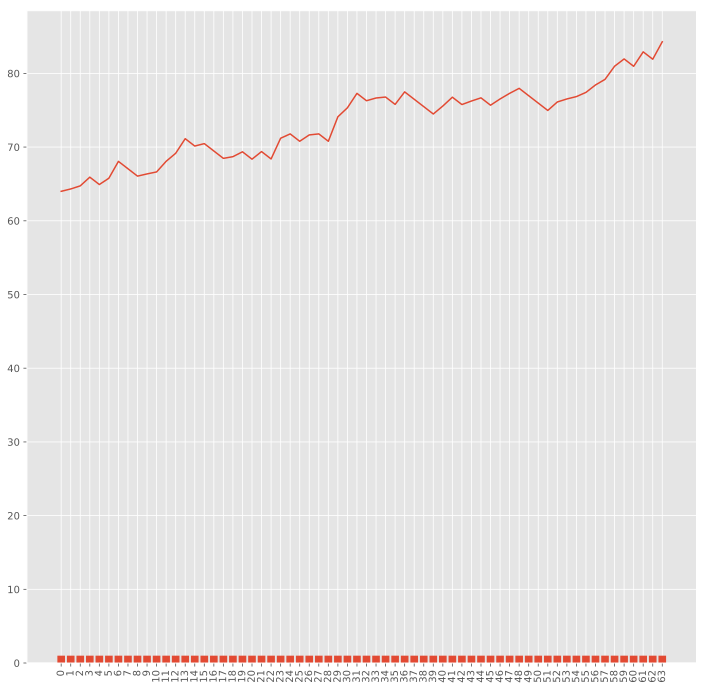

In [5]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds, plot=True)

Profit: 59.2067%
Balance:  101.892297645


/Users/villetoiviainen/Documents/dev/world_cup/notebook_helpers.py:12: RuntimeWarning: invalid value encountered in log
  return -(p1 * np.log(1 + o1*a - b - c) + p2 * np.log(1 + o2*b - a - c) + p3*np.log(1 + o3*c - a - b))


101.89229764485904

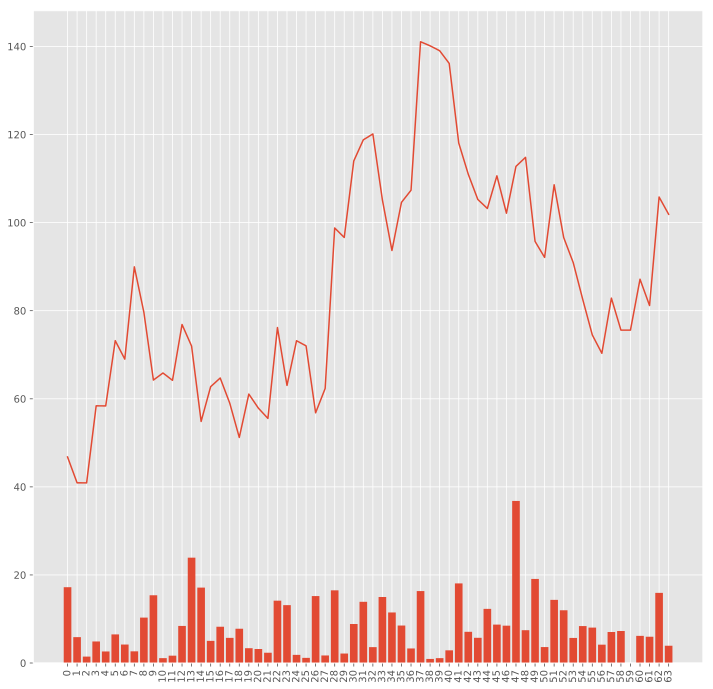

In [8]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_true, odds, probabilities, plot=True, coef=1)